In [1]:
# AML Project 1

# to run: $
# jupyter nbconvert --to notebook --inplace --execute Project1.ipynb

# MI: 1 = yes, 2 = no
# gener: 1 = female, 2 = male

# simple kNN example
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)

X = [[0], [0], [2], [3]]
y = [0, 0, 1, 1]

neigh.fit(X, y)
print(neigh.predict([[1.1]]))
print(neigh.predict_proba([[1.1]]))

[0]
[[0.66666667 0.33333333]]


{2: 2, 1: 1} 

    ParticipantID  Income  Sex  Age  Race  Edu  Diastolic    Systolic  Pulse  \
1               2    5.00    2   49     3  5.0  64.000000  102.666667   66.0   
6               7    5.00    2   64     4  5.0  77.333333  131.333333   64.0   
7               8    1.84    1   54     3  4.0  76.000000  116.000000   76.0   
8               9    4.71    2   72     3  3.0  76.000000  107.333333   68.0   
10             11    1.56    1   68     4  3.0  82.666667  140.666667   76.0   

     BMI  HDL  Trig  LDL  TCHOL  kidneys_eGFR  Diabetes  CurrentSmoker  \
1   22.4   63    60  108    183    101.217970       2.0              2   
6   29.2   70   101  139    229     96.384780       3.0              2   
7   33.6   59    97  144    222     79.772596       2.0              2   
8   63.6   62   110  134    218     90.743557       2.0              2   
10  27.0   49    55   90    150     50.802761       2.0              2   

    isActive  isInsured  MI  
1        2.0        1.0   2  

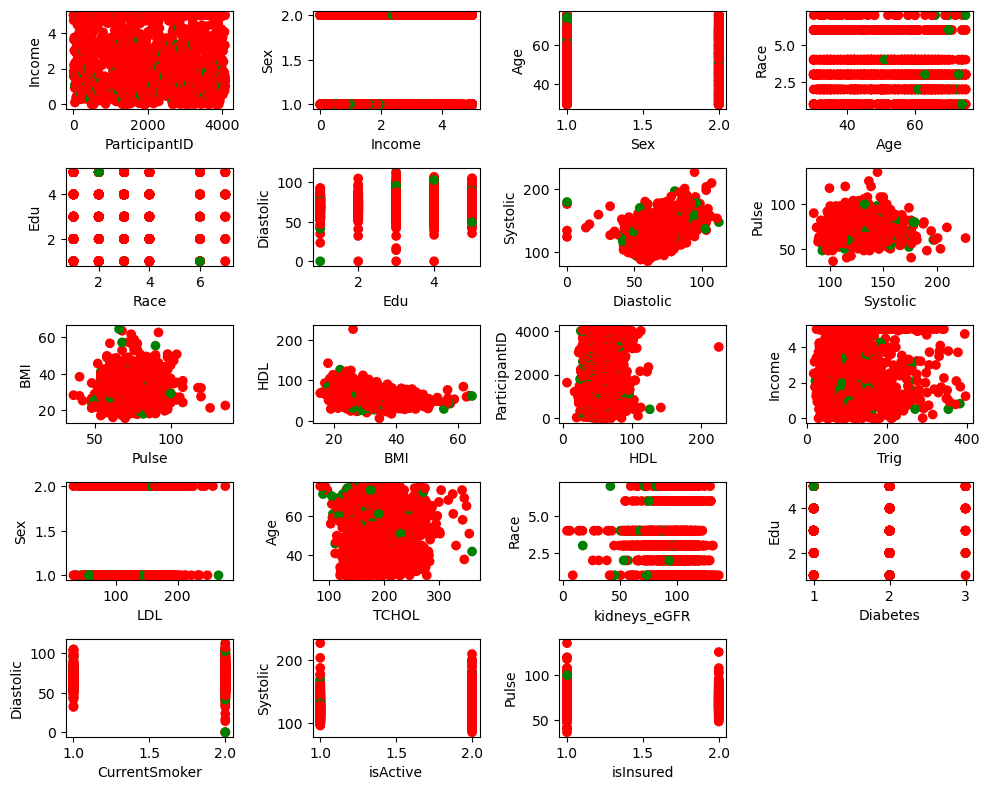

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rc("figure", figsize=(10, 8))

patients_df = pd.read_csv("NHANES_data_train.csv").dropna()
#print(patients_df.columns)

# create a mapping of the label
lookup_patient_name = dict(zip(patients_df.MI.unique(), patients_df.MI.unique()))

print(lookup_patient_name, "\n")
print(patients_df.head(5))

X = patients_df[['ParticipantID', 'Income', 'Sex', 'Age', 'Race', 'Edu', 'Diastolic', 'Systolic', 'Pulse', 'BMI', 'HDL', 'Trig', 'LDL', 'TCHOL', 'kidneys_eGFR', 'Diabetes', 'CurrentSmoker', 'isActive', 'isInsured']]
y = patients_df['MI']

Labels = y
colors = ['green', 'red' ]
clabels = [colors[i-1] for i in Labels]

# plot
fig = plt.figure()
features = ['ParticipantID', 'Income', 'Sex', 'Age', 'Race', 'Edu', 'Diastolic', 'Systolic', 'Pulse', 'BMI', 'HDL', 'Trig', 'LDL', 'TCHOL', 'kidneys_eGFR', 'Diabetes', 'CurrentSmoker', 'isActive', 'isInsured']

for fig in range(19):
    plt.subplot(5, 4, fig+1)
    x = X[features[fig]]
    y = X[features[(fig+1)%11]]
    plt.scatter(x, y, color=clabels)
    plt.xlabel(features[fig])
    plt.ylabel(features[(fig+1)%11])

plt.tight_layout()
plt.show()


array([[<Axes: xlabel='ParticipantID', ylabel='ParticipantID'>,
        <Axes: xlabel='Income', ylabel='ParticipantID'>,
        <Axes: xlabel='Sex', ylabel='ParticipantID'>,
        <Axes: xlabel='Age', ylabel='ParticipantID'>,
        <Axes: xlabel='Race', ylabel='ParticipantID'>,
        <Axes: xlabel='Edu', ylabel='ParticipantID'>,
        <Axes: xlabel='Diastolic', ylabel='ParticipantID'>,
        <Axes: xlabel='Systolic', ylabel='ParticipantID'>,
        <Axes: xlabel='Pulse', ylabel='ParticipantID'>,
        <Axes: xlabel='BMI', ylabel='ParticipantID'>,
        <Axes: xlabel='HDL', ylabel='ParticipantID'>,
        <Axes: xlabel='Trig', ylabel='ParticipantID'>,
        <Axes: xlabel='LDL', ylabel='ParticipantID'>,
        <Axes: xlabel='TCHOL', ylabel='ParticipantID'>,
        <Axes: xlabel='kidneys_eGFR', ylabel='ParticipantID'>,
        <Axes: xlabel='Diabetes', ylabel='ParticipantID'>,
        <Axes: xlabel='CurrentSmoker', ylabel='ParticipantID'>,
        <Axes: xlabel='isAct

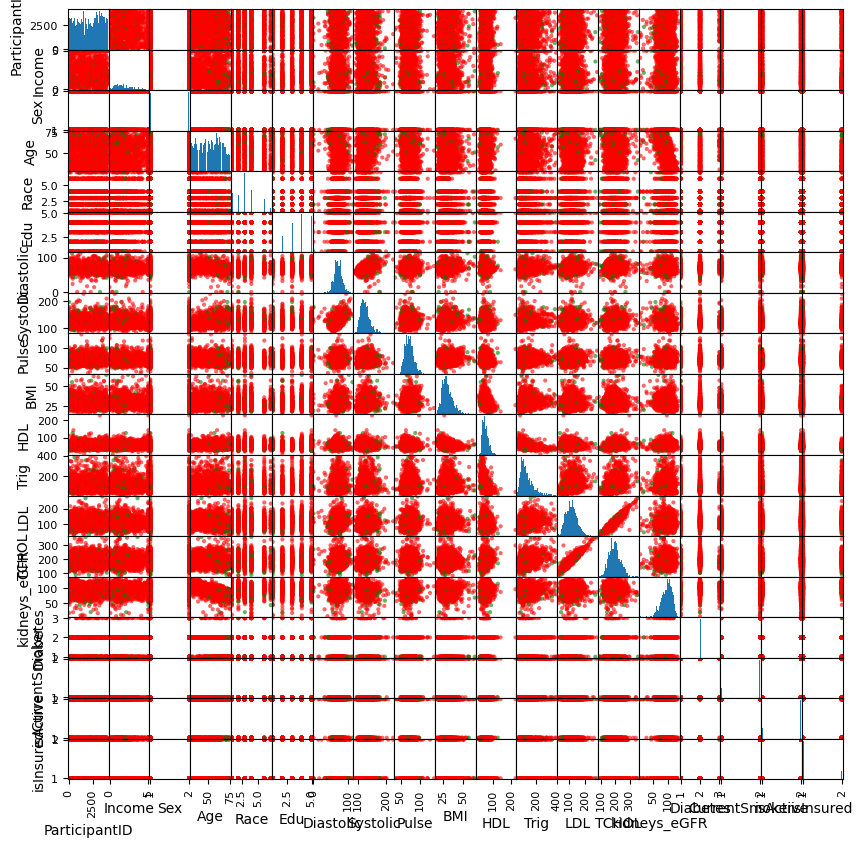

In [3]:
# Other ways to visualize: plotting a scatter matrix
from pandas.plotting import scatter_matrix

scatter_matrix(X, color=clabels, alpha=0.6, figsize=(10,10), hist_kwds={'bins':50})

In [4]:
from sklearn.neighbors import KNeighborsClassifier

patients_df = pd.read_csv("NHANES_data_train.csv").dropna()

X = patients_df[['ParticipantID', 'Income', 'Sex', 'Age', 'Race', 'Edu', 'Diastolic', 'Systolic', 'Pulse', 'BMI', 'HDL', 'Trig', 'LDL', 'TCHOL', 'kidneys_eGFR', 'Diabetes', 'CurrentSmoker', 'isActive', 'isInsured']]
y = patients_df['MI']

clf = KNeighborsClassifier(n_neighbors=5)

clf.fit(X, y)
print("accuracy:", clf.score(X, y))
yP = clf.predict(X)
match = y == yP
print("accuracy% = ", sum(match)/len(y)*100)
TP = pd.DataFrame({"True label": y, "Predicted":yP})
TP.T

accuracy: 0.9568294409058741
accuracy% =  95.68294409058741


,1,6,7,8,10,15,16,19,21,25,...,4057,4060,4062,4064,4065,4068,4072,4073,4074,4076
True label,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
Predicted,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

patients_df = pd.read_csv("NHANES_data_train.csv").dropna()
#print(patients_df.columns)
print(patients_df.MI.unique())
print(patients_df.head(5))

X = patients_df[['ParticipantID', 'Income', 'Sex', 'Age', 'Race', 'Edu', 'Diastolic', 'Systolic', 'Pulse', 'BMI', 'HDL', 'Trig', 'LDL', 'TCHOL', 'kidneys_eGFR', 'Diabetes', 'CurrentSmoker', 'isActive', 'isInsured']]
y = patients_df['MI']

clf2 = Pipeline(
    steps=[("scaler", StandardScaler()), \
           ("knn", KNeighborsClassifier(n_neighbors=3))]
)

clf2.fit(X, y)
print("accuracy:", clf2.score(X, y))

[2 1]
    ParticipantID  Income  Sex  Age  Race  Edu  Diastolic    Systolic  Pulse  \
1               2    5.00    2   49     3  5.0  64.000000  102.666667   66.0   
6               7    5.00    2   64     4  5.0  77.333333  131.333333   64.0   
7               8    1.84    1   54     3  4.0  76.000000  116.000000   76.0   
8               9    4.71    2   72     3  3.0  76.000000  107.333333   68.0   
10             11    1.56    1   68     4  3.0  82.666667  140.666667   76.0   

     BMI  HDL  Trig  LDL  TCHOL  kidneys_eGFR  Diabetes  CurrentSmoker  \
1   22.4   63    60  108    183    101.217970       2.0              2   
6   29.2   70   101  139    229     96.384780       3.0              2   
7   33.6   59    97  144    222     79.772596       2.0              2   
8   63.6   62   110  134    218     90.743557       2.0              2   
10  27.0   49    55   90    150     50.802761       2.0              2   

    isActive  isInsured  MI  
1        2.0        1.0   2  
6       

In [6]:
# Splitting data into random train and test subsets is essential in machine learning 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

patients_df = pd.read_csv("NHANES_data_train.csv").dropna()

X = patients_df[['ParticipantID', 'Income', 'Sex', 'Age', 'Race', 'Edu', 'Diastolic', 'Systolic', 'Pulse', 'BMI', 'HDL', 'Trig', 'LDL', 'TCHOL', 'kidneys_eGFR', 'Diabetes', 'CurrentSmoker', 'isActive', 'isInsured']]
y = patients_df['MI']

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, stratify=y, random_state=30)  # default .75/.25; try: random_state=1

clf2 = Pipeline(
    steps=[("scaler", StandardScaler()), \
           ("knn", KNeighborsClassifier(n_neighbors=3))]
)

clf2.fit(X_train, y_train)
print("accuracy:", clf2.score(X_test, y_test)) 

accuracy: 0.9548022598870056


accuracy: [0.9265536723163842, 0.8954802259887006, 0.9519774011299436, 0.9463276836158192, 0.9548022598870056, 0.9548022598870056, 0.9548022598870056, 0.9548022598870056, 0.9548022598870056, 0.9548022598870056, 0.9548022598870056, 0.9548022598870056, 0.9548022598870056, 0.9548022598870056, 0.9548022598870056, 0.9548022598870056, 0.9548022598870056, 0.9548022598870056, 0.9548022598870056]


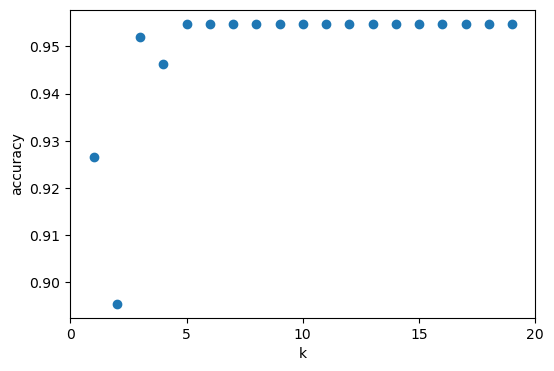

In [7]:
# How sensitive is k-NN classification accuracy to the choice of the 'k' parameter?
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

patients_df = pd.read_csv("NHANES_data_train.csv").dropna()

X = patients_df[['ParticipantID', 'Income', 'Sex', 'Age', 'Race', 'Edu', 'Diastolic', 'Systolic', 'Pulse', 'BMI', 'HDL', 'Trig', 'LDL', 'TCHOL', 'kidneys_eGFR', 'Diabetes', 'CurrentSmoker', 'isActive', 'isInsured']]
y = patients_df['MI']

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, stratify=y, random_state=10)  # default .75/.25; try: random_state=1


k_range = range(1, 20)
scores = []
for k in k_range:
    clf2 = Pipeline(
        steps=[("scaler", StandardScaler()), \
               ("knn", KNeighborsClassifier(n_neighbors=k))]
    )
    clf2.fit(X_train, y_train)
    scores.append(clf2.score(X_test, y_test))

print("accuracy:", scores)

import matplotlib.pyplot as plt
plt.rc("figure", figsize=(6, 4))
plt.scatter(k_range, scores)
plt.xticks([0, 5, 10, 15, 20])
plt.xlabel('k')
plt.ylabel('accuracy')
plt.show()

accuracy: [0.9575971731448764, 0.9551886792452831, 0.9558303886925795, 0.9561527581329562, 0.9563679245283019, 0.9535353535353536, 0.9549071618037135]


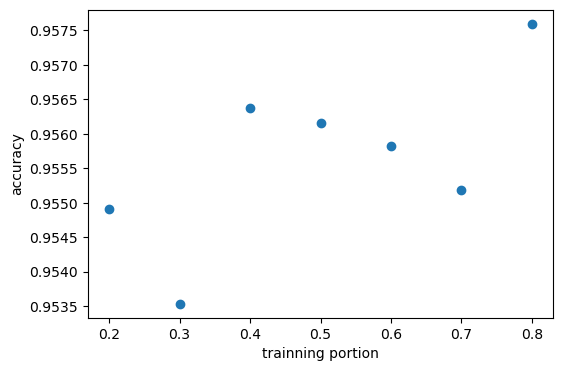

In [8]:
# How sensitive is k-NN classification accuracy to the train/test split proportion?
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

patients_df = pd.read_csv("NHANES_data_train.csv").dropna()

X = patients_df[['ParticipantID', 'Income', 'Sex', 'Age', 'Race', 'Edu', 'Diastolic', 'Systolic', 'Pulse', 'BMI', 'HDL', 'Trig', 'LDL', 'TCHOL', 'kidneys_eGFR', 'Diabetes', 'CurrentSmoker', 'isActive', 'isInsured']]
y = patients_df['MI']


partition_range = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

k = 5
scores = []
for s in partition_range:
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, stratify=y, test_size=1-s, random_state=10) 
    
    clf2 = Pipeline(
        steps=[("scaler", StandardScaler()), \
               ("knn", KNeighborsClassifier(n_neighbors=k))]
    )
    clf2.fit(X_train, y_train)
    scores.append(clf2.score(X_test, y_test))
print("accuracy:", scores)

import matplotlib.pyplot as plt
plt.rc("figure", figsize=(6, 4))
plt.scatter(partition_range, scores)
plt.xticks(partition_range)
plt.xlabel('trainning portion')
plt.ylabel('accuracy')
plt.show()

In [9]:
# More measures on the accuracy of knn

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

patients_df = pd.read_csv("NHANES_data_train.csv").dropna()

X = patients_df[['ParticipantID', 'Income', 'Sex', 'Age', 'Race', 'Edu', 'Diastolic', 'Systolic', 'Pulse', 'BMI', 'HDL', 'Trig', 'LDL', 'TCHOL', 'kidneys_eGFR', 'Diabetes', 'CurrentSmoker', 'isActive', 'isInsured']]
y = patients_df['MI']

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, stratify=y, random_state=1)  # default .75/.25; try: random_state=1

clf2 = Pipeline(
    steps=[("scaler", StandardScaler()), \
           ("knn", KNeighborsClassifier(n_neighbors=10))]
)

clf2.fit(X_train, y_train)
print("accuracy:", clf2.score(X_test, y_test)) 

from sklearn.metrics import confusion_matrix
y_predicted = clf2.predict(X_test)
print("confusion matrix:\n", confusion_matrix(y_test, y_predicted))

accuracy: 0.9548022598870056
confusion matrix:
 [[  0  16]
 [  0 338]]


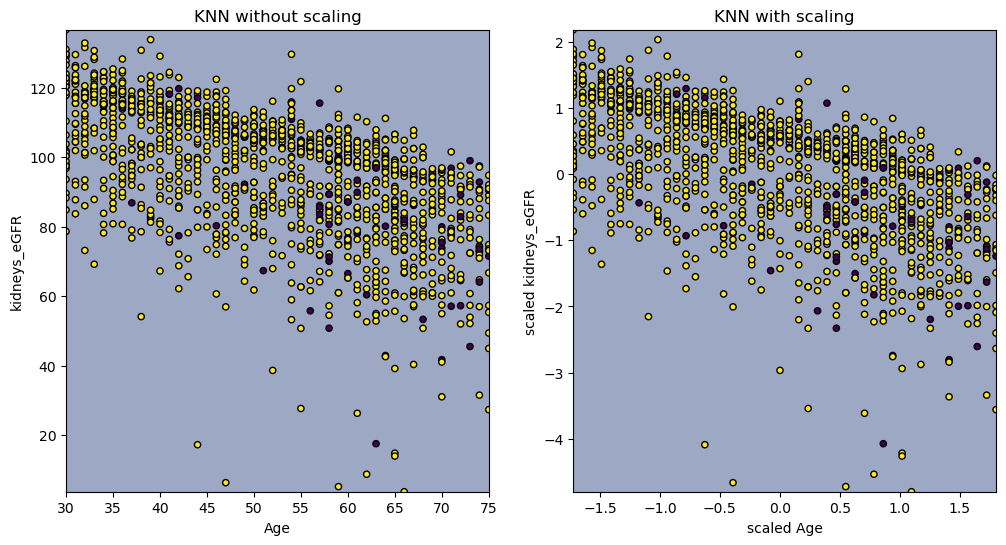

In [10]:
# scaling vs no scaling scaling (sample)

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

patients_df = pd.read_csv("NHANES_data_train.csv").dropna()

X = patients_df[['ParticipantID', 'Income', 'Sex', 'Age', 'Race', 'Edu', 'Diastolic', 'Systolic', 'Pulse', 'BMI', 'HDL', 'Trig', 'LDL', 'TCHOL', 'kidneys_eGFR', 'Diabetes', 'CurrentSmoker', 'isActive', 'isInsured']]
y = patients_df['MI']

scaler = StandardScaler().set_output(transform="pandas")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
)
scaled_X_train = scaler.fit_transform(X_train)

import matplotlib.pyplot as plt

from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neighbors import KNeighborsClassifier



X_plot = X[["Age", "kidneys_eGFR"]]
X_plot_scaled = scaler.fit_transform(X_plot)
clf = KNeighborsClassifier(n_neighbors=20)


def fit_and_plot_model(X_plot, y, clf, ax):
    clf.fit(X_plot, y)
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_plot,
        response_method="predict",
        alpha=0.5,
        ax=ax,
    )
    disp.ax_.scatter(X_plot["Age"], X_plot["kidneys_eGFR"], c=y, s=20, edgecolor="k")
    disp.ax_.set_xlim((X_plot["Age"].min(), X_plot["Age"].max()))
    disp.ax_.set_ylim((X_plot["kidneys_eGFR"].min(), X_plot["kidneys_eGFR"].max()))
    return disp.ax_


fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

fit_and_plot_model(X_plot, y, clf, ax1)
ax1.set_title("KNN without scaling")

fit_and_plot_model(X_plot_scaled, y, clf, ax2)
ax2.set_xlabel("scaled Age")
ax2.set_ylabel("scaled kidneys_eGFR")
_ = ax2.set_title("KNN with scaling")